# Description: 
This is a sentiment analysis program that parses the tweets fetched from Twitter using Python

In [0]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import re

In [2]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving Login.csv to Login.csv


In [0]:
# Get the data
log = pd.read_csv('Login.csv')

In [0]:
# Twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [0]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [6]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "BillGates", count = 100, lang = "en", tweet_mode = "extended")

# Print the last 5 tweets from the account
print("Show the 5 recents tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.full_text + "\n")
  i = i + 1

Show the 5 recents tweets: 

1) @narendramodi @gatesfoundation Thank you for the conversation and partnership, @narendramodi. Combating the pandemic requires global collaboration. India’s role is key as the world works to minimize social and economic impact, and pave the way to vaccine, testing, and treatment access for all. @PMOIndia

2) I’m hopeful that this program will improve our understanding of the coronavirus outbreak in Seattle and provide valuable information about the virus for other communities around the world. https://t.co/wnFarp28ys

3) RT @melindagates: When will America be able to get back to work? 

The answer depends on whether workers have caregiving options they can r…

4) Class of 2020, these are not easy times. But we will get through them. And with your leadership, the world will be stronger than before. https://t.co/rypFlsAles

5) RT @melindagates: To overcome #COVID19 the world doesn’t just need science. It needs a commitment to help people beat this virus whe

In [9]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])

# Show the first 5 rows of data
df.head()

,Tweets
0,@narendramodi @gatesfoundation Thank you for t...
1,I’m hopeful that this program will improve our...
2,RT @melindagates: When will America be able to...
3,"Class of 2020, these are not easy times. But w..."
4,RT @melindagates: To overcome #COVID19 the wor...


In [10]:
# Clean the text

# Create a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removed @mentioned
  text = re.sub(r'#', '', text) # Removing the '#' symbol
  text = re.sub(r'RT[\s]+', '', text) # Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text)  # Removing the hyper link

  return text

# Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned text
df

,Tweets
0,Thank you for the conversation and partnersh...
1,I’m hopeful that this program will improve our...
2,: When will America be able to get back to wor...
3,"Class of 2020, these are not easy times. But w..."
4,: To overcome COVID19 the world doesn’t just n...
...,...
95,The world has made incredible strides toward e...
96,"At , an auto parts maker in Chattanooga, Tenne..."
97,Dr. LeAndrea Ware is one of the most energetic...
98,We’re getting closer to having a blood test fo...


In [11]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,Thank you for the conversation and partnersh...,0.316667,0.058333
1,I’m hopeful that this program will improve our...,0.375000,-0.125000
2,: When will America be able to get back to wor...,0.312500,0.250000
3,"Class of 2020, these are not easy times. But w...",0.833333,-0.216667
4,: To overcome COVID19 the world doesn’t just n...,0.000000,0.000000
...,...,...,...
95,The world has made incredible strides toward e...,0.488889,0.466667
96,"At , an auto parts maker in Chattanooga, Tenne...",0.540000,0.160000
97,Dr. LeAndrea Ware is one of the most energetic...,0.416667,0.333333
98,We’re getting closer to having a blood test fo...,0.500000,0.000000


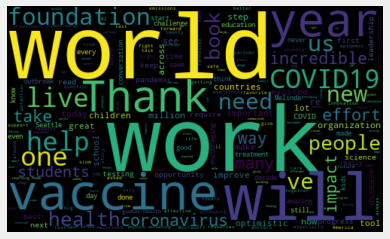

In [12]:
# Plot the Word Cloud
allWords = ' '.join([twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [13]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Thank you for the conversation and partnersh...,0.316667,0.058333,Positive
1,I’m hopeful that this program will improve our...,0.375000,-0.125000,Negative
2,: When will America be able to get back to wor...,0.312500,0.250000,Positive
3,"Class of 2020, these are not easy times. But w...",0.833333,-0.216667,Negative
4,: To overcome COVID19 the world doesn’t just n...,0.000000,0.000000,Neutral
...,...,...,...,...
95,The world has made incredible strides toward e...,0.488889,0.466667,Positive
96,"At , an auto parts maker in Chattanooga, Tenne...",0.540000,0.160000,Positive
97,Dr. LeAndrea Ware is one of the most energetic...,0.416667,0.333333,Positive
98,We’re getting closer to having a blood test fo...,0.500000,0.000000,Neutral


In [14]:
# Print all of the positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'): 
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j + 1

1)   Thank you for the conversation and partnership, . Combating the pandemic requires global collaboration. India’s role is key as the world works to minimize social and economic impact, and pave the way to vaccine, testing, and treatment access for all. 

2) : When will America be able to get back to work? 

The answer depends on whether workers have caregiving options they can r…

3) Humankind has never had a more urgent task than creating broad immunity for coronavirus. It’s going to require a global cooperative effort like the world has never seen. But I know we’ll get it done. There’s simply no alternative. 

4) : Developing a vaccine against COVID19 is among the first steps to a solution.

Distributing the vaccine safely, effect…

5) We don't yet have all the tools we need to stop the novel coronavirus and safely re-open the economy. But they are on the horizon. 

6) This is a great introduction to computer science concepts for students at all levels. I’m looking forward to join

In [15]:
# print the negative tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending = False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j = j + 1

1) I’m hopeful that this program will improve our understanding of the coronavirus outbreak in Seattle and provide valuable information about the virus for other communities around the world. 

2) Class of 2020, these are not easy times. But we will get through them. And with your leadership, the world will be stronger than before. 

3) Halting funding for the World Health Organization during a world health crisis is as dangerous as it sounds. Their work is slowing the spread of COVID-19 and if that work is stopped no other organization can replace them. The world needs  now more than ever.

4) I always enjoy chatting with , even though we had to sit a little bit further apart than usual this time. 

5) Extreme physical distancing measures will make a big difference in the U.S., but we need a consistent nationwide approach. Until the case numbers start to go down across America—which could take 10 weeks or more—no one can continue business as usual or relax the shutdown.

6) Science is

Text(0, 0.5, 'Subjectivity')

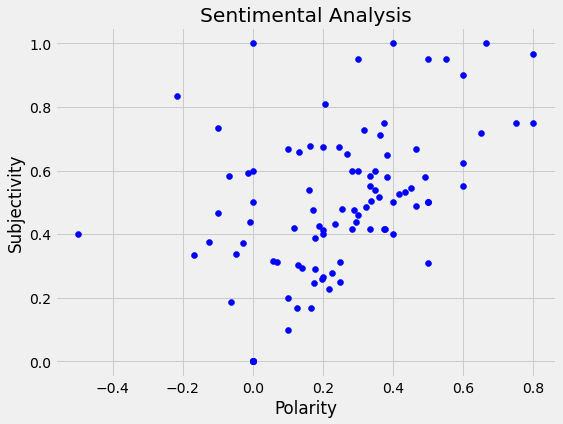

In [16]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title("Sentimental Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [17]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

77.0

In [18]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]) * 100, 1)

12.0

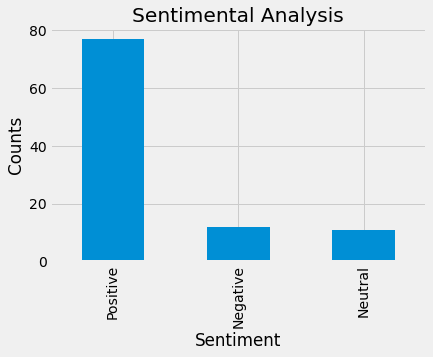

In [19]:
# Show the value counts
df['Analysis'].value_counts()

# plot and visualize the counts
plt.title('Sentimental Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()